In [2]:
import sqlite3
import numpy as np
# %load_ext cudf.pandas
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import sweetviz as sv

In [3]:
# SQLite データベースに接続
connect = sqlite3.connect("telecom.sqlite3")

# テーブル一覧を表示
cursor = connect.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# テーブル名を表示
for table in tables:
    print(table[0])

# 接続を閉じる
connect.close()


connect = sqlite3.connect("telecom.sqlite3")

record = pd.read_sql("select * from Record", con=connect)
client = pd.read_sql("select * from Client", con=connect)

uni_df = pd.merge(record, client, on="Customer_ID", how="inner")

uni_df = uni_df.dropna(subset=["change_mou"])
uni_df = uni_df[uni_df["rev_Mean"] >= 0]

uni_df[uni_df["change_mou"].isna() == True]
analy_df = uni_df


Record
Client


In [4]:
columns_to_encode = ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', \
       'dualband', 'refurb_new', 'hnd_price', 'hnd_webcap', 'ownrent', \
       'dwlltype', 'marital', 'infobase', 'numbcars', 'HHstatin', 'dwllsize', \
       'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', \
       'creditcd']


label_encoder = LabelEncoder()
# 各カラムに対してラベルエンコーディングを実施
for column in columns_to_encode:
    # 欠損値を考慮してfit_transform
    analy_df[column] = label_encoder.fit_transform(analy_df[column].astype(str))


analy_df['churn'].value_counts()

churn
0    50223
1    48884
Name: count, dtype: int64

## 解約者と非解約者に分けた月間利用時間の前三か月平均との比較の変化率 

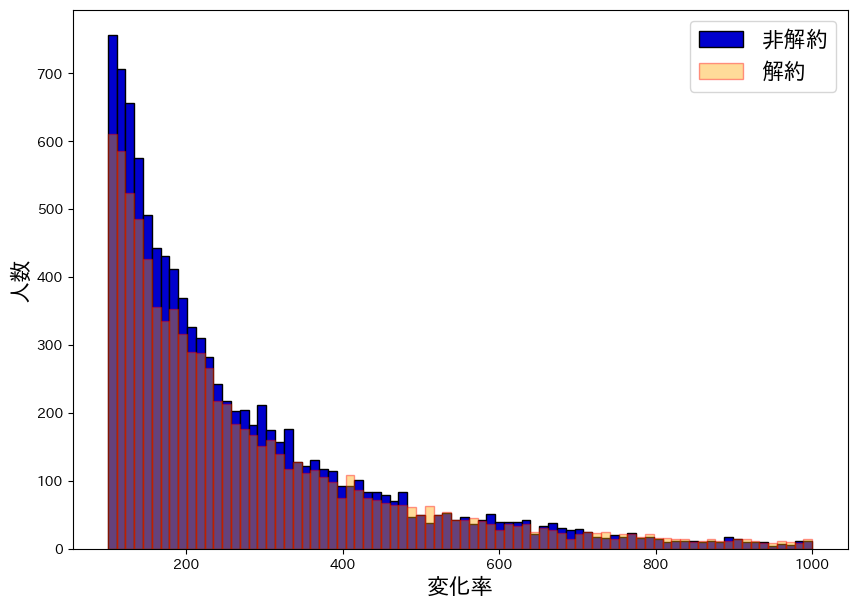

In [5]:
# 解約者と非解約者に分けた月間利用時間の前三か月平均との比較の変化率 

plt.figure(figsize=(10, 7))
plt.xlabel("変化率", fontsize=16)
plt.ylabel("人数", fontsize=16)

# plt.gca().set_facecolor('lavender')
# x軸のラベルを指定
# plt.xlabel('change_mou', fontsize=15)


# グリッドを表示
# plt.grid(True)


# churnが0のデータのヒストグラム
plt.hist(x=analy_df[analy_df["churn"] == 0]["change_mou"], bins=80, range=(100, 1000), edgecolor='black', color="mediumblue", label='非解約')

# churnが1のデータのヒストグラムを重ねて表示
plt.hist(x=analy_df[analy_df["churn"] == 1]["change_mou"], bins=80, range=(100, 1000), color="orange", edgecolor='red', alpha=0.4, label='解約')

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 凡例を表示
plt.legend(fontsize='16')



# 表示
plt.show()

## # 解約者と非解約者に分けた直近6か月の平均月間利用時間

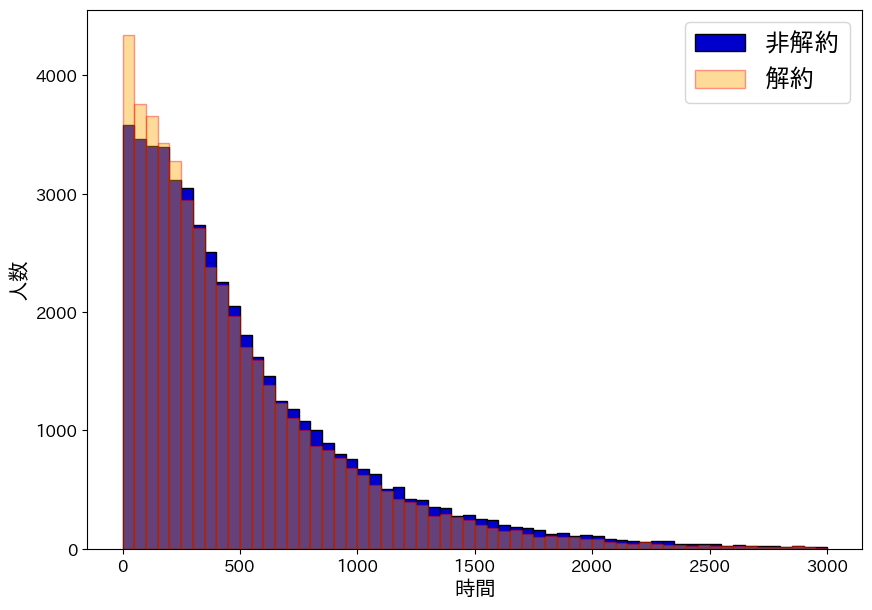

In [6]:
# グラフの大きさ指定
plt.figure(figsize = (10, 7))

# x軸のラベルを指定
# plt.title()
plt.xlabel('時間', fontsize=15)
plt.ylabel("人数", fontsize=15)

# ヒストグラムの描写
# plt.hist(x=analy_df['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
plt.hist(x=analy_df[analy_df["churn"] == 0]["avg6mou"], bins=60, range=(0, 3000), edgecolor='black', color="mediumblue", label='非解約')
plt.hist(x=analy_df[analy_df["churn"] == 1]["avg6mou"], bins=60, range=(0, 3000), color="orange", edgecolor='red', alpha=0.4, label='解約')

plt.legend(fontsize=18)

# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## 月間平均利用時間

max avgrev    924.27
dtype: float64
min avgrev    0.48
dtype: float64


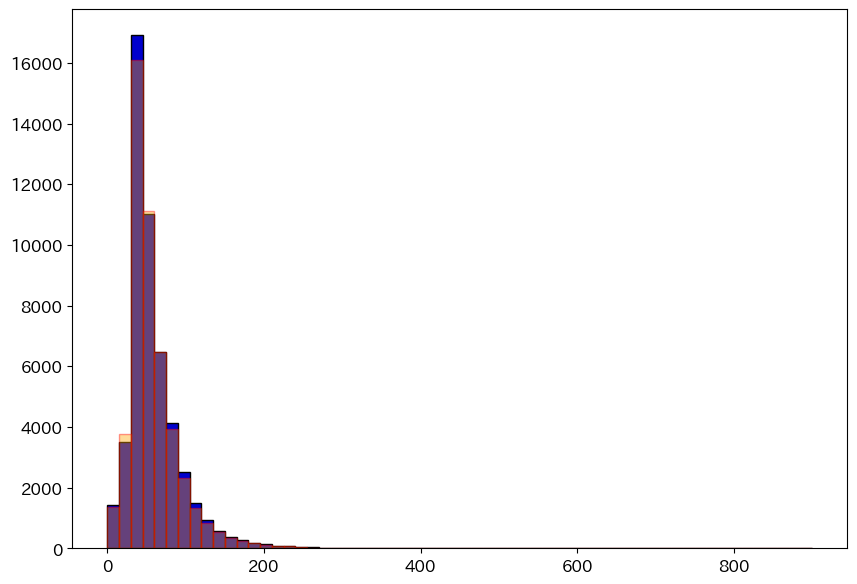

In [7]:
# グラフの大きさ指定
feau = ["avgrev"]
plt.figure(figsize = (10, 7))

print("max", analy_df[feau].max())
print("min", analy_df[feau].min())

# x軸のラベルを指定
# plt.title()
# plt.xlabel('時間', fontsize=15)
# plt.ylabel("人数", fontsize=15)

# ヒストグラムの描写
# plt.hist(x=analy_df['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
plt.hist(x=analy_df[analy_df["churn"] == 0][feau], bins=60, range=(0, 900), edgecolor='black', color="mediumblue", label='非解約')
plt.hist(x=analy_df[analy_df["churn"] == 1][feau], bins=60, range=(0, 900), color="orange", edgecolor='red', alpha=0.4, label='解約')
# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## 現在の機器の日数

max mou_Mean    12206.75
dtype: float64
min mou_Mean    0.0
dtype: float64


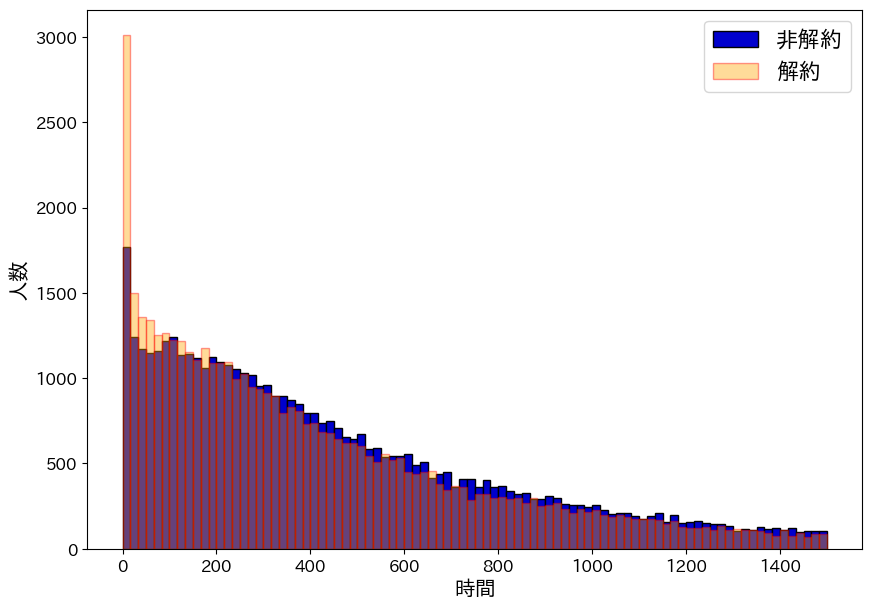

In [8]:
# グラフの大きさ指定
feau = ["mou_Mean"]
plt.figure(figsize = (10, 7))

print("max", analy_df[feau].max())
print("min", analy_df[feau].min())

# x軸のラベルを指定
# plt.title()
plt.xlabel('時間', fontsize=15)
plt.ylabel("人数", fontsize=15)

# 対数スケールに設定
# plt.xscale('log')

# ヒストグラムの描写
# plt.hist(x=analy_df['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
plt.hist(x=analy_df[analy_df["churn"] == 0][feau], bins=90, range=(0, 1500), edgecolor='black', color="mediumblue", label='非解約')
plt.hist(x=analy_df[analy_df["churn"] == 1][feau], bins=90, range=(0, 1500), color="orange", edgecolor='red', alpha=0.4, label='解約')

plt.legend(fontsize='16')
# plt.hist(x=analy_df[analy_df["churn"] == 0][feau], bins=80, range=(1000, 3000), edgecolor='black', color="mediumblue", label='churn=0')
# plt.hist(x=analy_df[analy_df["churn"] == 1][feau], bins=80, range=(1000, 3000), color="orange", edgecolor='red', alpha=0.4, label='churn=1')

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## サービス利用期間の総月数

max change_mou    31219.25
dtype: float64
min change_mou   -3875.0
dtype: float64


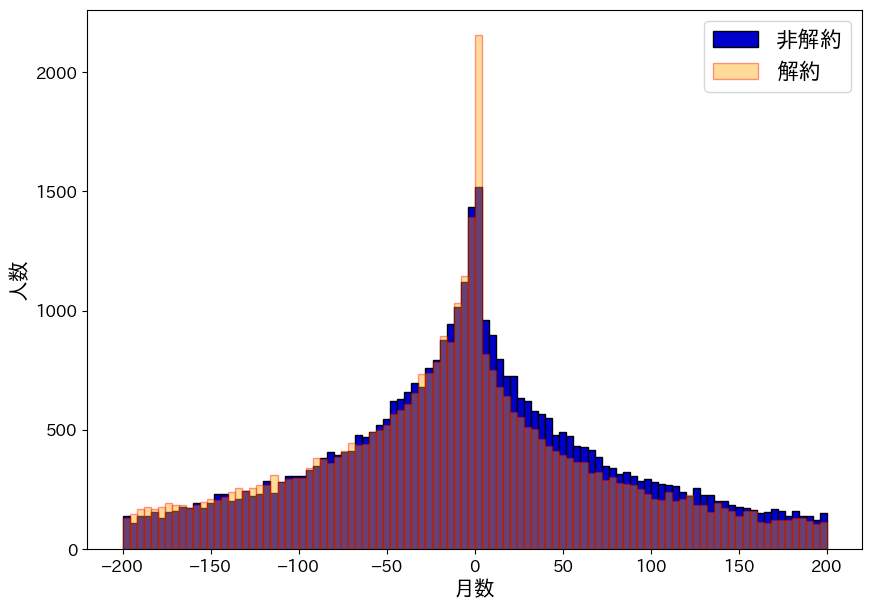

In [9]:
# グラフの大きさ指定
feau = ["change_mou"]
plt.figure(figsize = (10, 7))

print("max", analy_df[feau].max())
print("min", analy_df[feau].min())

# x軸のラベルを指定
# plt.title()
plt.xlabel('月数', fontsize=15)
plt.ylabel("人数", fontsize=15)

# 対数スケールに設定
# plt.xscale('log')

# ヒストグラムの描写
# plt.hist(x=analy_df['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
plt.hist(x=analy_df[analy_df["churn"] == 0][feau], bins=100, range=(-200, 200), edgecolor='black', color="mediumblue", label='非解約')
plt.hist(x=analy_df[analy_df["churn"] == 1][feau], bins=100, range=(-200, 200), color="orange", edgecolor='red', alpha=0.4, label='解約')
# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize='16')

plt.show()

max avg6mou    7217.0
dtype: float64
min avg6mou    0.0
dtype: float64


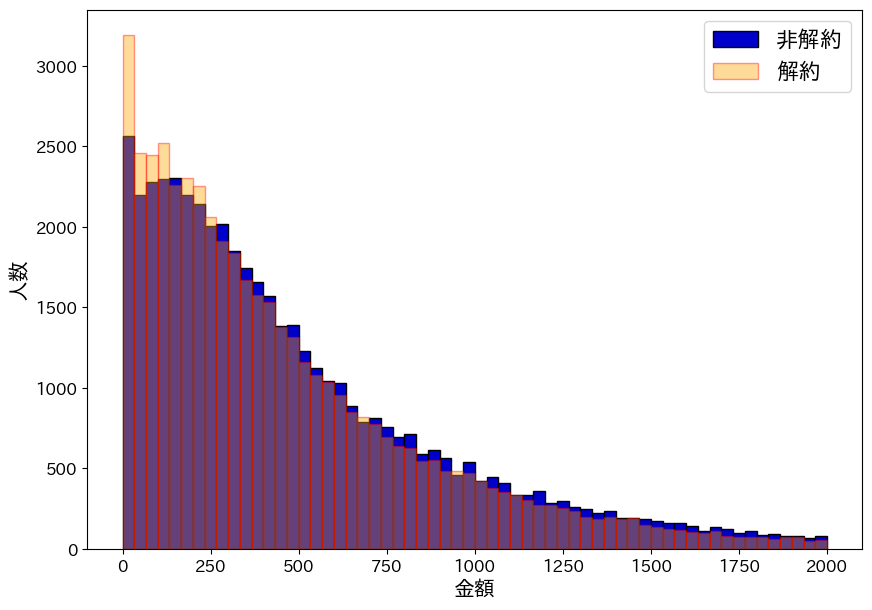

In [10]:
# グラフの大きさ指定
feau = ["avg6mou"]
plt.figure(figsize = (10, 7))

print("max", analy_df[feau].max())
print("min", analy_df[feau].min())

# x軸のラベルを指定
# plt.title()
plt.xlabel('金額', fontsize=15)
plt.ylabel("人数", fontsize=15)

# 対数スケールに設定
# plt.xscale('log')

# ヒストグラムの描写
# plt.hist(x=analy_df['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
plt.hist(x=analy_df[analy_df["churn"] == 0][feau], bins=60, range=(0, 2000), edgecolor='black', color="mediumblue", label='非解約')
plt.hist(x=analy_df[analy_df["churn"] == 1][feau], bins=60, range=(0, 2000), color="orange", edgecolor='red', alpha=0.4, label='解約')
# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize='16')

plt.show()

In [11]:
test1 = analy_df[(0 < analy_df["totmrc_Mean"]) & (analy_df["totmrc_Mean"] < 38)]
test2 = analy_df[38 <= analy_df["totmrc_Mean"]]

In [12]:
test1["eqpdays"].median()

467.0

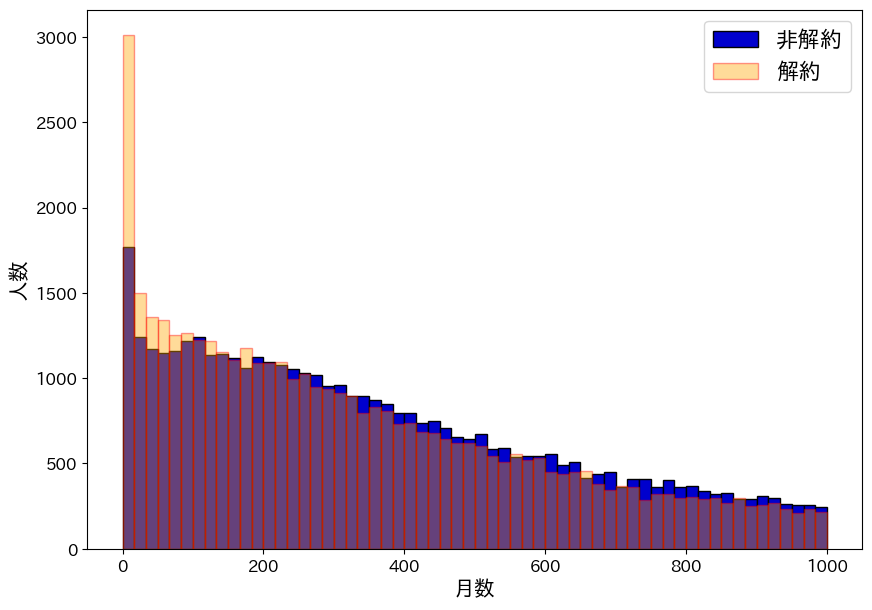

In [13]:
# グラフの大きさ指定
feau = ["mou_Mean"]
plt.figure(figsize = (10, 7))

# print("max", analy_df[feau].max())
# print("min", analy_df[feau].min())

# x軸のラベルを指定
# plt.title()
plt.xlabel('月数', fontsize=15)
plt.ylabel("人数", fontsize=15)

# 対数スケールに設定
# plt.xscale('log')

# ヒストグラムの描写
# plt.hist(x=analy_df['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
plt.hist(x=analy_df[analy_df["churn"] == 0][feau], bins=60, range=(0, 1000), edgecolor='black', color="mediumblue", label='非解約')
plt.hist(x=analy_df[analy_df["churn"] == 1][feau], bins=60, range=(0, 1000), color="orange", edgecolor='red', alpha=0.4, label='解約')
# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize='16')

plt.show()

max ovrrev_Mean    1102.4
dtype: float64
min ovrrev_Mean    0.0
dtype: float64


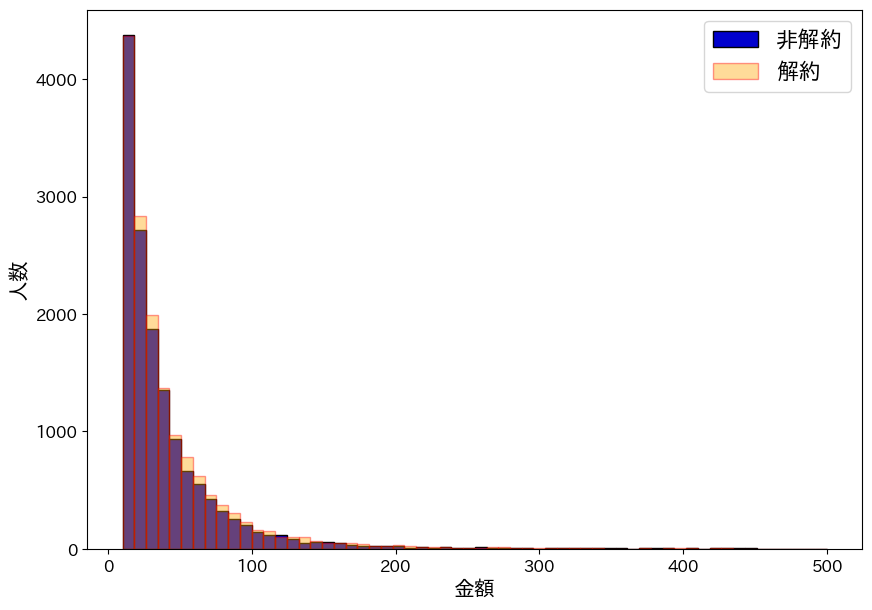

In [14]:
# グラフの大きさ指定
feau = ["ovrrev_Mean"]
plt.figure(figsize = (10, 7))

print("max", analy_df[feau].max())
print("min", analy_df[feau].min())

# x軸のラベルを指定
# plt.title()
plt.xlabel('金額', fontsize=15)
plt.ylabel("人数", fontsize=15)

# 対数スケールに設定
# plt.xscale('log')

# ヒストグラムの描写
# plt.hist(x=analy_df['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
plt.hist(x=analy_df[analy_df["churn"] == 0][feau], bins=60, range=(10, 500), edgecolor='black', color="mediumblue", label='非解約')
plt.hist(x=analy_df[analy_df["churn"] == 1][feau], bins=60, range=(10, 500), color="orange", edgecolor='red', alpha=0.4, label='解約')
# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize='16')

plt.show()

max revMean_PER_mouMean    163.23
dtype: float64
min revMean_PER_mouMean    0.0
dtype: float64


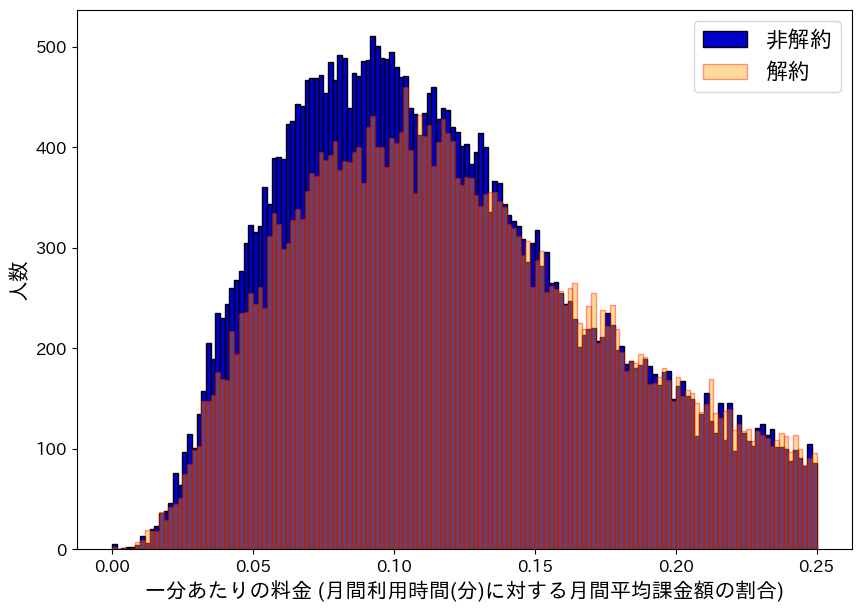

In [23]:
# グラフの大きさ指定
analy_df["revMean_PER_mouMean"] = ((analy_df["rev_Mean"]) / (analy_df["mou_Mean"]))
# analy_df["revMean_PER_mouMean"] = ((analy_df[0 < analy_df["rev_Mean"]]["rev_Mean"]) / (analy_df[0 < analy_df["mou_Mean"]]["mou_Mean"]))


feau = ["revMean_PER_mouMean"]
plt.figure(figsize = (10, 7))

print("max", analy_df[feau].max())
print("min", analy_df[feau].min())

# x軸のラベルを指定
# plt.title()
plt.xlabel('一分あたりの料金 (月間利用時間(分)に対する月間平均課金額の割合)', fontsize=15)
plt.ylabel("人数", fontsize=15)

# 対数スケールに設定
# plt.xscale('log')

# ヒストグラムの描写
# plt.hist(x=analy_df['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
plt.hist(x=analy_df[analy_df["churn"] == 0][feau], bins=150, range=(0, .25), edgecolor='black', color="mediumblue", label='非解約')
plt.hist(x=analy_df[analy_df["churn"] == 1][feau], bins=150, range=(0, .25), color="orange", edgecolor='red', alpha=0.4, label='解約')
# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize='16')

plt.show()

In [22]:
# # グラフの大きさ指定
# test = analy_df[(analy_df["rev_Mean"] > 0) & (analy_df["mou_Mean"] > 0)]
# test["revMean_PER_mouMean"] = ((test["rev_Mean"]) / (test["mou_Mean"]))
# # analy_df["revMean_PER_mouMean"] = ((analy_df[0 < analy_df["rev_Mean"]]["rev_Mean"]) / (analy_df[0 < analy_df["mou_Mean"]]["mou_Mean"]))

# feau = ["revMean_PER_mouMean"]
# plt.figure(figsize = (10, 7))

# print("max", test[feau].max())
# print("min", test[feau].min())

# # x軸のラベルを指定
# # plt.title()
# plt.xlabel('割合', fontsize=15)
# plt.ylabel("人数", fontsize=15)

# # 対数スケールに設定
# # plt.xscale('log')

# # ヒストグラムの描写
# # plt.hist(x=test['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
# plt.hist(x=test[test["churn"] == 0][feau], bins=150, range=(0, .25), edgecolor='black', color="mediumblue", label='非解約')
# plt.hist(x=test[test["churn"] == 1][feau], bins=150, range=(0, .25), color="orange", edgecolor='red', alpha=0.4, label='解約')
# # Seabornで描写する場合
# #sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# # 目盛りのフォントサイズを変更
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.legend(fontsize='16')

# plt.show()

In [16]:
analy_df[(0.02 <= analy_df["revMean_PER_mouMean"]) & (analy_df["revMean_PER_mouMean"] <= 0.09) & (analy_df["churn"] == 0)] \
	["mou_Mean"].sum() * 0.1



1384345.36250003

In [17]:
analy_df[(0.02 <= analy_df["revMean_PER_mouMean"]) & (analy_df["revMean_PER_mouMean"] <= 0.08) & (analy_df["churn"] == 0)] \
	["rev_Mean"].sum()

651360.96000002

In [132]:
analy_df[(0.01 <= analy_df["revMean_PER_mouMean"]) & (analy_df["revMean_PER_mouMean"] <= 0.05)]["totmrc_Mean"].describe()

count    6189.000000
mean       40.605895
std        25.472909
min        -1.422500
25%        10.000000
50%        44.990000
75%        59.990000
max       209.990000
Name: totmrc_Mean, dtype: float64

In [133]:
analy_df[analy_df["revMean_PER_mouMean"] <= 0.05].loc[:, ["rev_Mean", "totmrc_Mean", "ovrrev_Mean"]]

,rev_Mean,totmrc_Mean,ovrrev_Mean
18,55.2700,49.9900,0.0000
21,60.1850,56.2500,0.0000
27,37.6625,35.9900,1.4250
76,26.0450,10.0000,11.1000
129,12.4925,10.0000,1.7500
...,...,...,...
99825,0.1500,0.0000,0.1500
99870,42.9800,44.9900,7.9900
99890,30.6050,40.4975,0.6125
99906,64.1100,69.9900,12.1000


In [157]:
analy_df[(0.09 <= analy_df["revMean_PER_mouMean"]) & (analy_df["revMean_PER_mouMean"] <= 0.1)]["churn"].mean()

0.4510528260066494

In [135]:
# test_df = pd.DataFrame()

# i = 0.1
# while (i < 164.0):
# 	if 40 <= i:
# 		subset_df = analy_df[40 <= analy_df["revMean_PER_mouMean"]]
# 		i = 165
# 	elif 10 <= i:
# 		subset_df = analy_df[(i <= analy_df["revMean_PER_mouMean"]) & (analy_df["revMean_PER_mouMean"] < (i + 10))]
# 		i = i + 10
# 	elif 2 <= i:
# 		subset_df = analy_df[(i <= analy_df["revMean_PER_mouMean"]) & (analy_df["revMean_PER_mouMean"] < (i + 2))]
# 		i = i + 2
# 	elif i < 2:
# 		subset_df = analy_df[(i <= analy_df["revMean_PER_mouMean"]) & (analy_df["revMean_PER_mouMean"] < (i + 0.2))]
# 		i = i + 0.2

# 	churn_rate = subset_df["churn"].mean()
# 	diff = churn_rate - 0.446
# 	factor = (1 / churn_rate) * diff

# 	# サンプリング数の計算
# 	sample_size = int(factor * subset_df[subset_df["churn"] == 1]["churn"].sum())

# 	# 解約者を無作為にサンプリング
# 	sampled_churn = np.random.choice(subset_df[subset_df["churn"] == 1].index, size=sample_size, replace=False)

# 	# サンプルデータフレームの作成
# 	set_df = subset_df.loc[sampled_churn]

# 	# データの連結
# 	test_df = pd.concat([test_df, set_df], ignore_index=True)

# # test_df

# test_df["mou_Mean"].sum() * 0.1


In [136]:
test_df = pd.DataFrame()


rPm_df = analy_df.sort_values("revMean_PER_mouMean")
rPm_df = rPm_df[0.1 < rPm_df["revMean_PER_mouMean"]]

rPm_df

split_dfs = [rPm_df.iloc[i:i+1000] for i in range(0, len(rPm_df), 1000)]

# 結果を表示

for subset_df in split_dfs:
    churn_rate = subset_df["churn"].mean()
    
	
    diff = churn_rate - 0.446
    # if (diff < 0):
	# 				factor = 0
    # else:
    factor = (1 / churn_rate) * diff

    # サンプリング数の計算
    sample_size = int(factor * subset_df[subset_df["churn"] == 1]["churn"].sum())

    # 解約者を無作為にサンプリング
    sampled_churn = np.random.choice(subset_df[subset_df["churn"] == 1].index, size=sample_size, replace=False)

    # サンプルデータフレームの作成
    set_df = subset_df.loc[sampled_churn]

    # データの連結
    test_df = pd.concat([test_df, set_df], ignore_index=True)

test_df["mou_Mean"].sum() * 0.1

105053.1999999777

全体 22729
利用率増加者の割合 0.332746711249945
利用率低下者の割合 0.5129570152668397
変化なし 0.15429627348321528


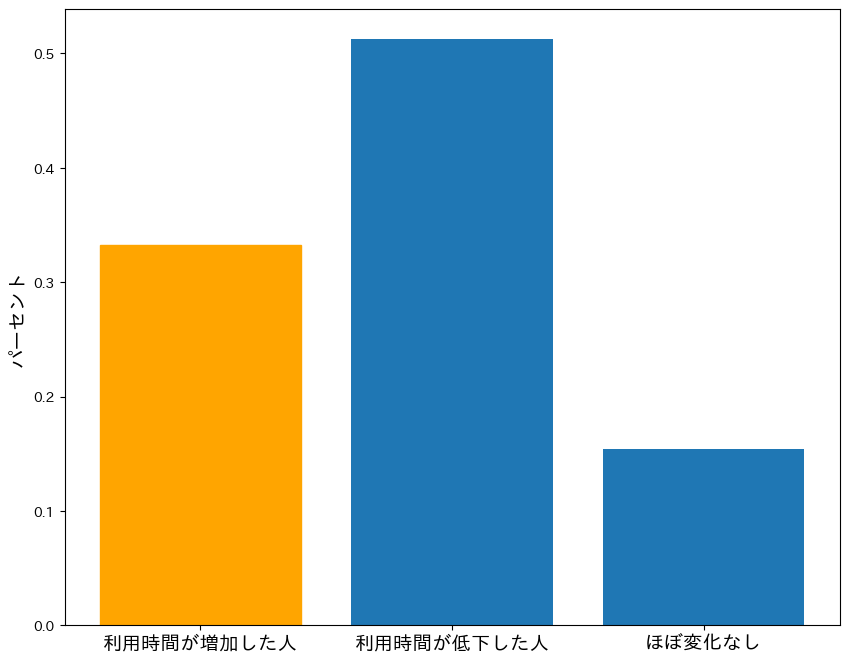

In [139]:
all = analy_df[(analy_df["churn"] == 1) & (0.16 <= analy_df["revMean_PER_mouMean"])].shape[0]

inc = analy_df[(analy_df["churn"] == 1) & (0.16 <= analy_df["revMean_PER_mouMean"]) \
		  & (5 < analy_df["change_mou"])].shape[0]

des = analy_df[(analy_df["churn"] == 1) & (0.16 <= analy_df["revMean_PER_mouMean"]) \
		  & (analy_df["change_mou"] < -5)].shape[0]

same = analy_df[(analy_df["churn"] == 1) & (0.16 <= analy_df["revMean_PER_mouMean"]) \
		  & (-5 <= analy_df["change_mou"]) & (analy_df["change_mou"] <= 5)].shape[0]


print("全体", all)
print("利用率増加者の割合", inc / all)
print("利用率低下者の割合", des / all)
print("変化なし", same / all)


plt.figure(figsize=(10,8))

# churnが0の場合のovrmou_Meanの中央値を取得
median_value1 = inc / all
median_value2 = des / all
median_value3 = same / all


# 中央値をバーとして表示
bars = plt.bar(x=['利用時間が増加した人', '利用時間が低下した人', 'ほぼ変化なし'], height=[median_value1, median_value2, median_value3])
bars[0].set_color('orange') # 利用時間が増加した解約者

# グラフのタイトルと軸ラベル
# plt.title('Median of ovrmou_Mean for churn=0 and churn=1 (change_mou conditions)')
# plt.xlabel('Feature')
plt.ylabel('パーセント', fontsize=14)
plt.xticks(fontsize=14)

# グリッドの表示
# plt.grid(True)

# グラフの表示
plt.show()

In [140]:
analy_df[(analy_df["churn"] == 0) ]["ovrrev_Mean"].mean()

12.854470461740856

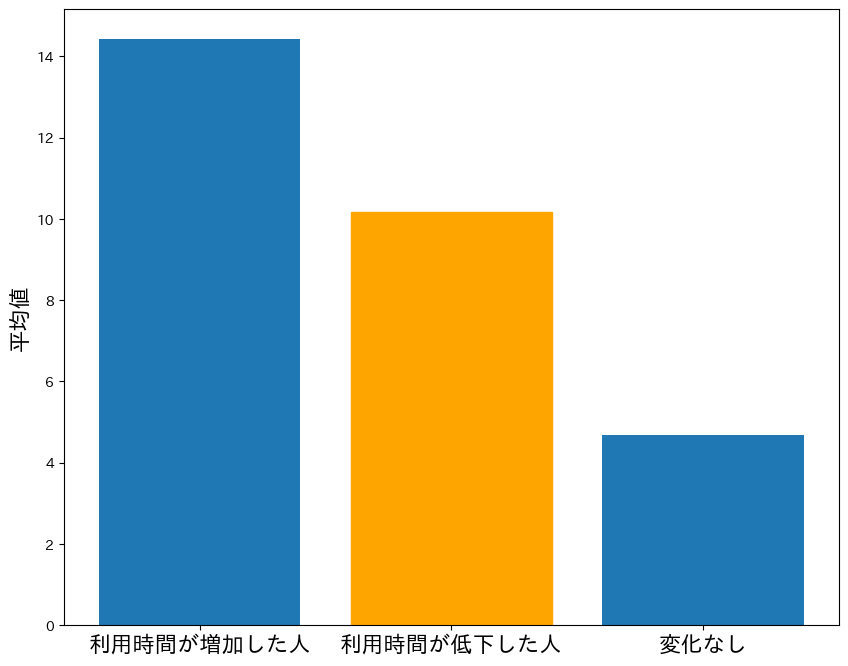

In [141]:



plt.figure(figsize=(10,8))

# churnが0の場合のovrmou_Meanの中央値を取得
median_value1 = analy_df[(analy_df["churn"] == 1) & (0.16 <= analy_df["revMean_PER_mouMean"]) \
		  & (5 < analy_df["change_mou"])]["ovrrev_Mean"].mean()
median_value2 = analy_df[(analy_df["churn"] == 1) & (0.16 <= analy_df["revMean_PER_mouMean"]) \
		  & (analy_df["change_mou"] < -5)]["ovrrev_Mean"].mean()
median_value3 = analy_df[(analy_df["churn"] == 1) & (0.16 <= analy_df["revMean_PER_mouMean"]) \
		  & (5 <= analy_df["change_mou"]) & (analy_df["change_mou"] <= 5)]["ovrrev_Mean"].mean()


# 中央値をバーとして表示
bars = plt.bar(x=['利用時間が増加した人', '利用時間が低下した人', '変化なし'], height=[median_value1, median_value2, median_value3])
bars[1].set_color('orange') # 利用時間が増加した解約者

# グラフのタイトルと軸ラベル
# plt.title('Median of ovrmou_Mean for churn=0 and churn=1 (change_mou conditions)')
# plt.xlabel('Feature')
plt.ylabel('平均値', fontsize=16)
plt.xticks(fontsize=16)

# グリッドの表示
# plt.grid(True)

# グラフの表示
plt.show()

In [142]:
# グラフの大きさ指定
feau = ["ovrrev_Mean"]
plt.figure(figsize = (10, 7))

print("max", analy_df[feau].max())
print("min", analy_df[feau].min())

# x軸のラベルを指定
# plt.title()
plt.xlabel('金額', fontsize=15)
plt.ylabel("人数", fontsize=15)

# 対数スケールに設定
# plt.xscale('log')

# ヒストグラムの描写
# plt.hist(x=analy_df['avg6mou'], bins=100, range=(0, 3000), edgecolor='black')
plt.hist(x=analy_df[analy_df["churn"] == 0][feau], bins=60, range=(10, 500), edgecolor='black', color="mediumblue", label='非解約')
plt.hist(x=analy_df[analy_df["churn"] == 1][feau], bins=60, range=(10, 500), color="orange", edgecolor='red', alpha=0.4, label='解約')
# Seabornで描写する場合
#sns.histplot(data=df, x='sepal_length', bins=25, binrange=(4.5, 7.5))

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize='16')

plt.show()

5826133.5616668295